<a href="https://colab.research.google.com/github/OlajideFemi/GeneralContent/blob/master/Back2Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

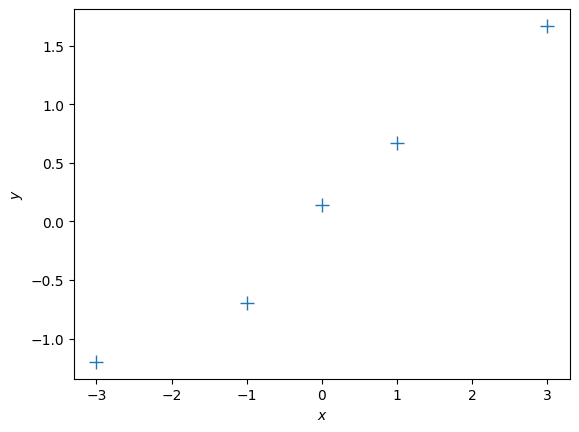

theta_ml = [[0.499]]


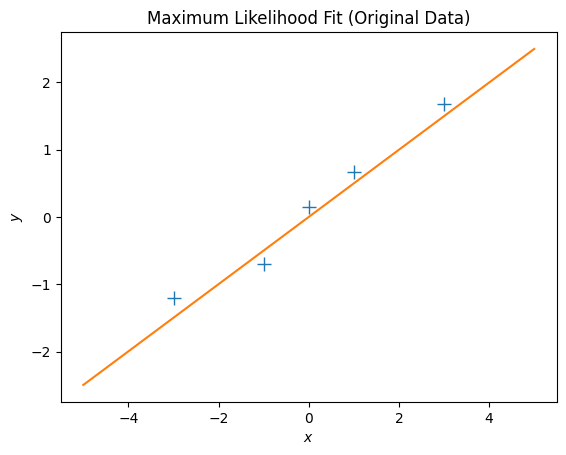

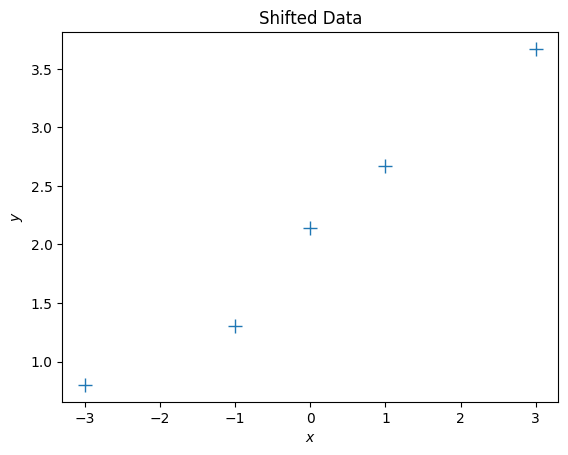

theta_ml (shifted data) = [[0.499]]


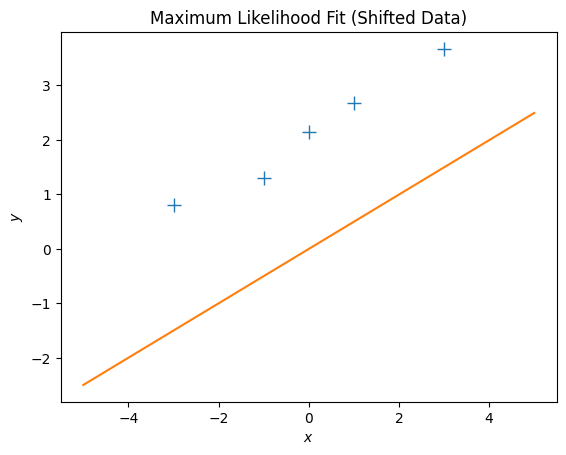

theta_aug_ml = [[0.116]
 [0.499]]


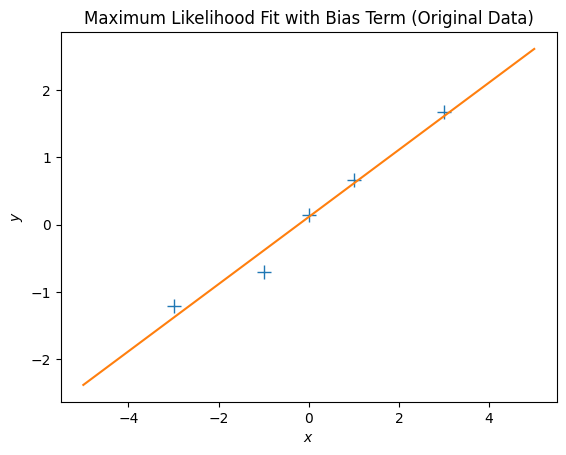

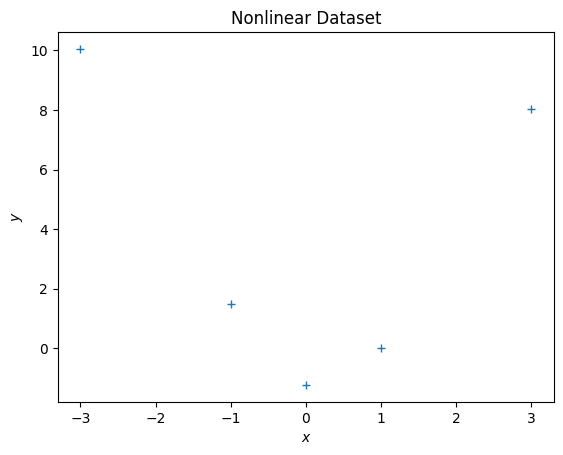

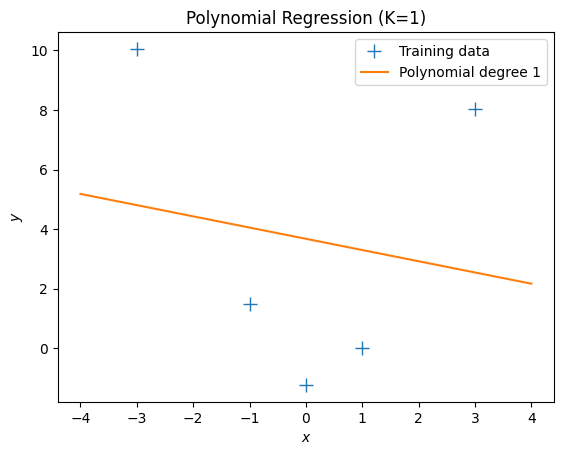

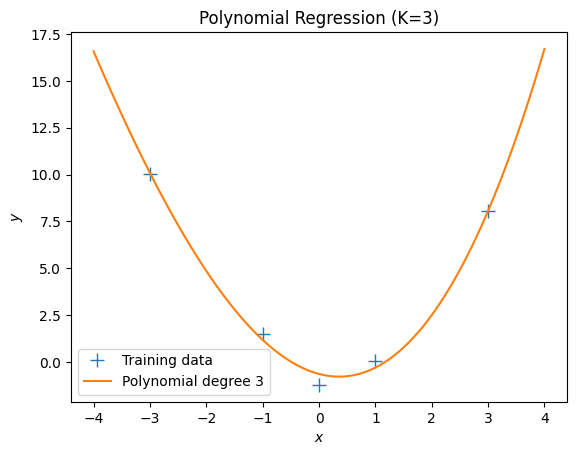

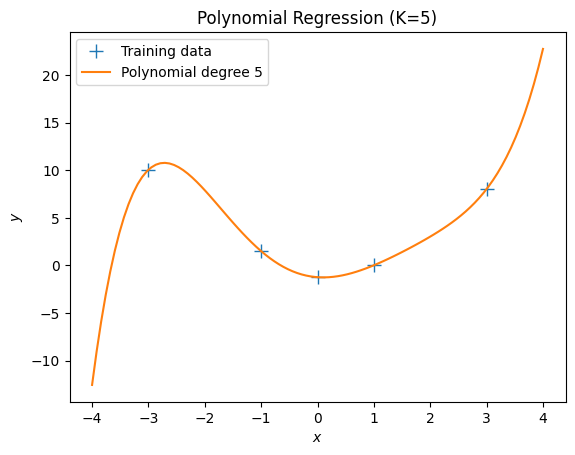

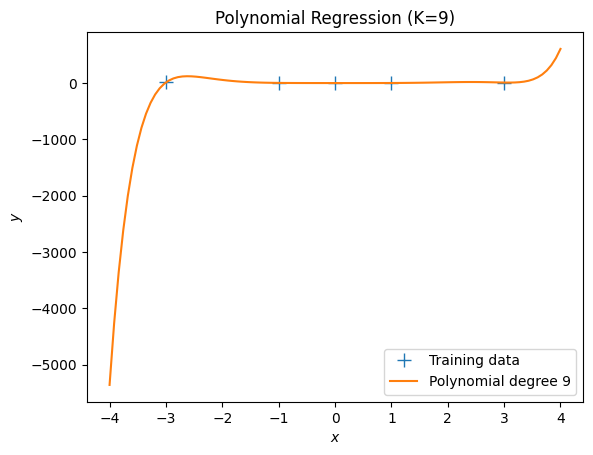

In [ ]:

#!/usr/bin/env python
# coding: utf-8

# # Linear Regression Tutorial
# by Marc Deisenroth

# The purpose of this notebook is to practice implementing some linear algebra (equations provided) and to explore some properties of linear regression.

import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

# Define training set
X = np.array([-3, -1, 0, 1, 3]).reshape(-1,1) # 5x1 vector, N=5, D=1
y = np.array([-1.2, -0.7, 0.14, 0.67, 1.67]).reshape(-1,1) # 5x1 vector

# Plot the training set
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

## 1. Maximum Likelihood

def max_lik_estimate(X, y):
    """
    X: N x D matrix of training inputs
    y: N x 1 vector of training targets/observations
    returns: maximum likelihood parameters (D x 1)
    """
    # Maximum likelihood estimate: θ = (X^T X)^{-1} X^T y
    theta_ml = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta_ml

# get maximum likelihood estimate
theta_ml = max_lik_estimate(X, y)
print("theta_ml =", theta_ml)

def predict_with_estimate(Xtest, theta):
    """
    Xtest: K x D matrix of test inputs
    theta: D x 1 vector of parameters
    returns: prediction of f(Xtest); K x 1 vector
    """
    # Linear prediction: y = X @ θ
    prediction = Xtest @ theta
    return prediction

# define a test set
Xtest = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(Xtest, theta_ml)

# plot
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Maximum Likelihood Fit (Original Data)")
plt.show()

# Add 2.0 to every y-value
ynew = y + 2.0

plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Shifted Data")
plt.show()

# get maximum likelihood estimate for shifted data
theta_ml_new = max_lik_estimate(X, ynew)
print("theta_ml (shifted data) =", theta_ml_new)

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction_new = predict_with_estimate(Xtest, theta_ml_new)

# plot
plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.plot(Xtest, ml_prediction_new)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Maximum Likelihood Fit (Shifted Data)")
plt.show()

# Add bias term
N, D = X.shape
X_aug = np.hstack([np.ones((N,1)), X]) # augmented training inputs of size N x (D+1)
theta_aug = np.zeros((D+1, 1)) # new theta vector of size (D+1) x 1

def max_lik_estimate_aug(X_aug, y):
    """
    X_aug: N x (D+1) matrix of augmented training inputs (with bias column of ones)
    y: N x 1 vector of training targets/observations
    returns: maximum likelihood parameters (D+1 x 1)
    """
    # Maximum likelihood estimate for augmented features
    theta_aug_ml = np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T @ y
    return theta_aug_ml

theta_aug_ml = max_lik_estimate_aug(X_aug, y)
print("theta_aug_ml =", theta_aug_ml)

# define a test set (we also need to augment the test inputs with ones)
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest]) # 100 x (D + 1) vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction_aug = predict_with_estimate(Xtest_aug, theta_aug_ml)

# plot
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, ml_prediction_aug)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Maximum Likelihood Fit with Bias Term (Original Data)")
plt.show()

# New nonlinear dataset
y = np.array([10.05, 1.5, -1.234, 0.02, 8.03]).reshape(-1,1)
plt.figure()
plt.plot(X, y, '+')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Nonlinear Dataset")
plt.show()

### Polynomial Regression

def poly_features(X, K):
    """
    X: inputs of size N x 1
    K: degree of the polynomial
    computes the feature matrix Phi (N x (K+1))
    """
    X = X.flatten()
    N = X.shape[0]

    # Initialize Phi
    Phi = np.zeros((N, K+1))

    # Compute the feature matrix: each column i is x^i
    for i in range(K+1):
        Phi[:, i] = X ** i

    return Phi

def nonlinear_features_maximum_likelihood(Phi, y):
    """
    Phi: features matrix for training inputs. Size of N x D
    y: training targets. Size of N by 1
    returns: maximum likelihood estimator theta_ml. Size of D x 1
    """
    kappa = 1e-08 # 'jitter' term; good for numerical stability

    D = Phi.shape[1]

    # Maximum likelihood estimate with regularization term
    # θ_ML = (Φ^T Φ + κI)^{-1} Φ^T y
    theta_ml = np.linalg.inv(Phi.T @ Phi + kappa * np.eye(D)) @ Phi.T @ y

    return theta_ml

# Try different polynomial degrees
for K in [1, 3, 5, 9]:
    Phi = poly_features(X, K) # N x (K+1) feature matrix

    theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator

    # test inputs
    Xtest = np.linspace(-4,4,100).reshape(-1,1)

    # feature matrix for test inputs
    Phi_test = poly_features(Xtest, K)

    y_pred = Phi_test @ theta_ml # predicted y-values

    plt.figure()
    plt.plot(X, y, '+', markersize=10, label='Training data')
    plt.plot(Xtest, y_pred, label=f'Polynomial degree {K}')
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.title(f"Polynomial Regression (K={K})")
    plt.legend()
    plt.show()

theta_ml_new = [[0.499]]


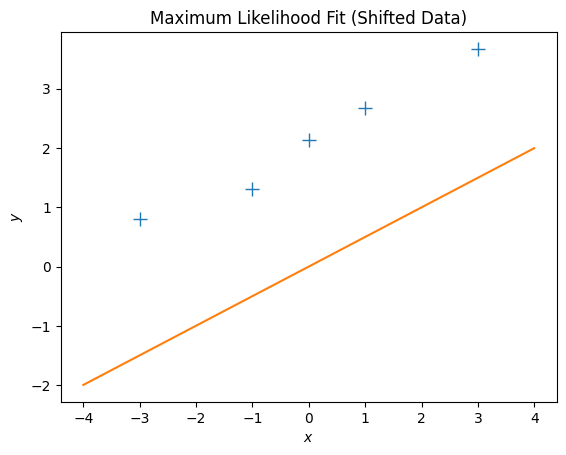

In [ ]:
theta_ml_new = max_lik_estimate(X, ynew)
print("theta_ml_new =", theta_ml_new)

# predict the function values at the test points using the new maximum likelihood estimator
ml_prediction_new = predict_with_estimate(Xtest, theta_ml_new)

# plot
plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.plot(Xtest, ml_prediction_new)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Maximum Likelihood Fit (Shifted Data)")
plt.show()

In [ ]:

def max_lik_estimate(X, y):
    return np.linalg.solve(X.T @ X, X.T @ y)

def max_lik_estimate_aug(X_aug, y):
    return np.linalg.solve(X_aug.T @ X_aug, X_aug.T @ y)

def nonlinear_features_maximum_likelihood(Phi, y):
    kappa = 1e-8
    D = Phi.shape[1]
    A = Phi.T @ Phi + kappa * np.eye(D)
    b = Phi.T @ y
    return np.linalg.solve(A, b)

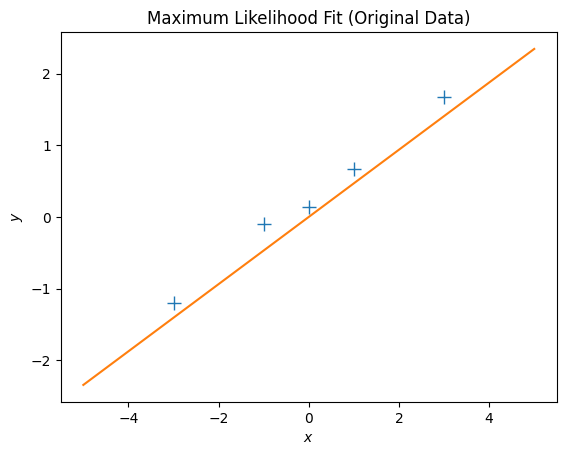

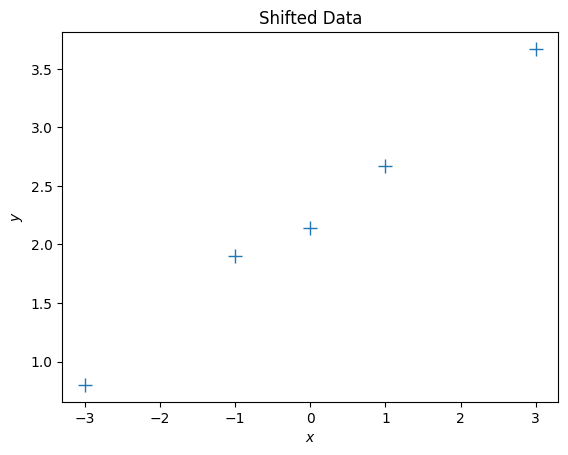

theta_ml (shifted data) = [[0.469]]


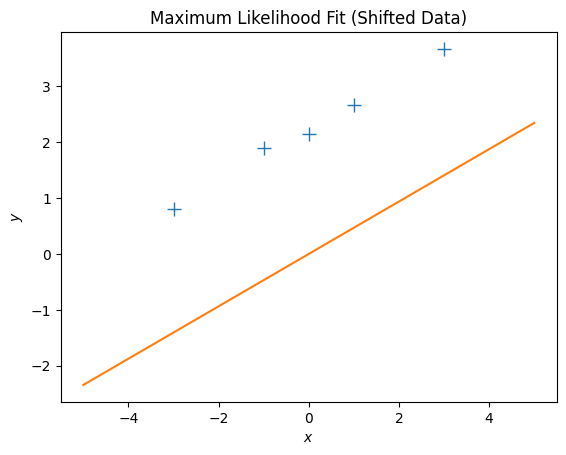

theta_aug_ml = [[0.236]
 [0.469]]


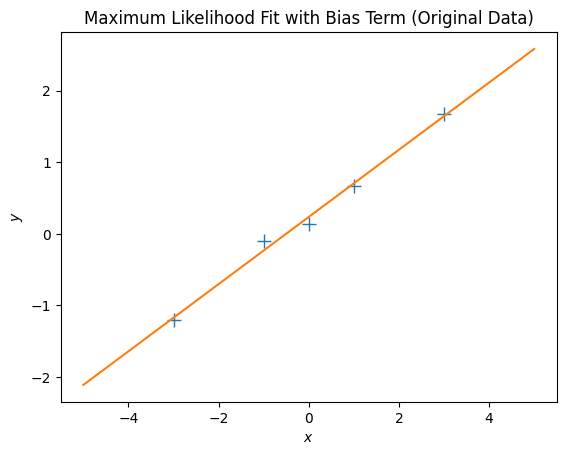

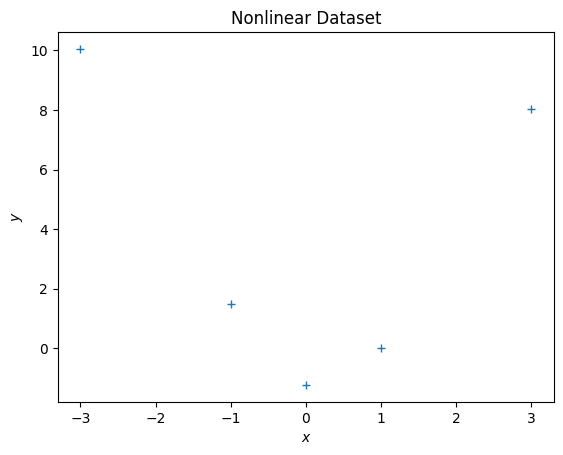

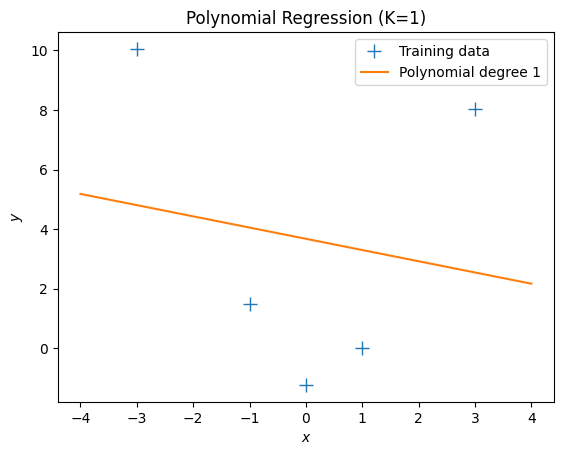

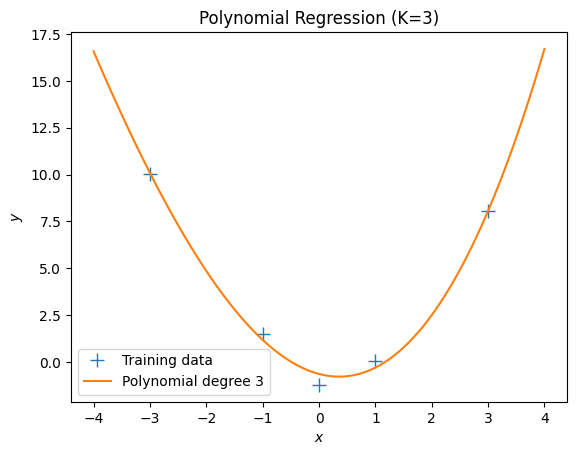

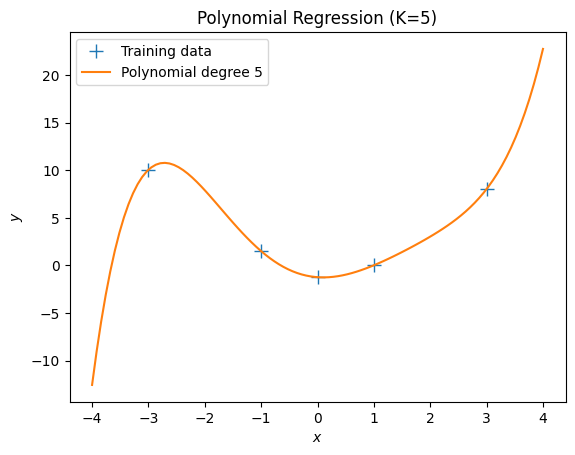

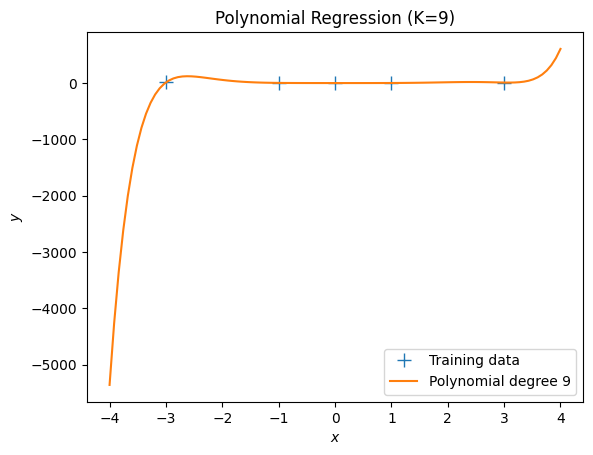

In [ ]:
# First, re-initialize y to the original linear dataset values
# This value comes from cell JM3m5DpaOVV7's initial definition of y
original_y_linear = np.array([-1.2, -0.1, 0.14, 0.67, 1.67]).reshape(-1,1)

# Re-calculate theta_ml for the initial linear regression
theta_ml_linear = max_lik_estimate(X, original_y_linear)

#define a test set
Xtest_linear = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(Xtest_linear, theta_ml_linear)

# plot
plt.figure()
plt.plot(X, original_y_linear, '+', markersize=10)
plt.plot(Xtest_linear, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Maximum Likelihood Fit (Original Data)")
plt.show()

# Add 2.0 to every y-value
ynew = original_y_linear + 2.0

plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Shifted Data")
plt.show()

# get maximum likelihood estimate for shifted data
theta_ml_new = max_lik_estimate(X, ynew)
print("theta_ml (shifted data) =", theta_ml_new)

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction_new = predict_with_estimate(Xtest_linear, theta_ml_new)

# plot
plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.plot(Xtest_linear, ml_prediction_new)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Maximum Likelihood Fit (Shifted Data)")
plt.show()

# Add bias term
N, D = X.shape
X_aug = np.hstack([np.ones((N,1)), X]) # augmented training inputs of size N x (D+1)
theta_aug_zero = np.zeros((D+1, 1)) # new theta vector of size (D+1) x 1

def max_lik_estimate_aug(X_aug, y_for_aug):
    """
    X_aug: N x (D+1) matrix of augmented training inputs (with bias column of ones)
    y: N x 1 vector of training targets/observations
    returns: maximum likelihood parameters (D+1 x 1)
    """
    # Maximum likelihood estimate for augmented features
    theta_aug_ml = np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T @ y_for_aug
    return theta_aug_ml

theta_aug_ml = max_lik_estimate_aug(X_aug, original_y_linear)
print("theta_aug_ml =", theta_aug_ml)

# define a test set (we also need to augment the test inputs with ones)
Xtest_aug = np.hstack([np.ones((Xtest_linear.shape[0],1)), Xtest_linear]) # 100 x (D + 1) vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction_aug = predict_with_estimate(Xtest_aug, theta_aug_ml)

# plot
plt.figure()
plt.plot(X, original_y_linear, '+', markersize=10)
plt.plot(Xtest_linear, ml_prediction_aug)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Maximum Likelihood Fit with Bias Term (Original Data)")
plt.show()

# New nonlinear dataset
y_nonlinear = np.array([10.05, 1.5, -1.234, 0.02, 8.03]).reshape(-1,1)
plt.figure()
plt.plot(X, y_nonlinear, '+')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Nonlinear Dataset")
plt.show()

### Polynomial Regression

def poly_features(X_in, K):
    """
    X: inputs of size N x 1
    K: degree of the polynomial
    computes the feature matrix Phi (N x (K+1))
    """
    X_in = X_in.flatten()
    N = X_in.shape[0]

    # Initialize Phi
    Phi = np.zeros((N, K+1))

    # Compute the feature matrix: each column i is x^i
    for i in range(K+1):
        Phi[:, i] = X_in ** i

    return Phi

def nonlinear_features_maximum_likelihood(Phi, y_in):
    """
    Phi: features matrix for training inputs. Size of N x D
    y: training targets. Size of N by 1
    returns: maximum likelihood estimator theta_ml. Size of D x 1
    """
    kappa = 1e-08 # 'jitter' term; good for numerical stability

    D = Phi.shape[1]

    # Maximum likelihood estimate with regularization term
    # θ_ML = (Φ^T Φ + κI)^{-1} Φ^T y
    theta_ml_poly = np.linalg.inv(Phi.T @ Phi + kappa * np.eye(D)) @ Phi.T @ y_in

    return theta_ml_poly

# Try different polynomial degrees
for K in [1, 3, 5, 9]:
    Phi = poly_features(X, K) # N x (K+1) feature matrix

    theta_ml_poly = nonlinear_features_maximum_likelihood(Phi, y_nonlinear) # maximum likelihood estimator

    # test inputs
    Xtest_poly = np.linspace(-4,4,100).reshape(-1,1)

    # feature matrix for test inputs
    Phi_test = poly_features(Xtest_poly, K)

    y_pred = Phi_test @ theta_ml_poly # predicted y-values

    plt.figure()
    plt.plot(X, y_nonlinear, '+', markersize=10, label='Training data')
    plt.plot(Xtest_poly, y_pred, label=f'Polynomial degree {K}')
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.title(f"Polynomial Regression (K={K})")
    plt.legend()
    plt.show()